In [2]:
import requests

#mengambil data dari website
resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json')
jatim = resp_jatim.json()
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
jabar = resp_jabar.json()
resp_jateng = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TENGAH.json')
jateng = resp_jateng.json()
resp_dki = requests.get('https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json')
dki = resp_dki.json()
resp_banten = requests.get('https://data.covid19.go.id/public/api/prov_detail_BANTEN.json')
banten = resp_banten.json()
resp_diy = requests.get('https://data.covid19.go.id/public/api/prov_detail_DAERAH_ISTIMEWA_YOGYAKARTA.json')
diy = resp_diy.json()

In [3]:
#mengambil data yang diperlukan
provinsi = ['DKI Jakarta', 'Banten', 'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur']
prov = [dki, banten, jabar, jateng, diy, jatim]

data = {'provinsi':[], 'kasus_total':[], 'meninggal_persen':[], 'sembuh_persen':[]}
for idx in range(len(prov)):
  data['provinsi'].append(provinsi[idx])
  data['kasus_total'].append(prov[idx]['kasus_total'])
  data['meninggal_persen'].append(prov[idx]['meninggal_persen'])
  data['sembuh_persen'].append(prov[idx]['sembuh_persen'])

print(data)

{'provinsi': ['DKI Jakarta', 'Banten', 'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 'Jawa Timur'], 'kasus_total': [401110, 46241, 270711, 180489, 37589, 145240], 'meninggal_persen': [1.6302261225100347, 2.582124089011916, 1.316902527049141, 4.304417443722333, 2.44486418899146, 7.168135499862297], 'sembuh_persen': [96.73331505073422, 93.29383015073203, 88.05183387450086, 87.27955720293204, 85.53566202878503, 90.95910217570918]}


In [4]:
import pandas as pd

#mengubah data ke bentuk dataframe
data = pd.DataFrame.from_dict(data)

data = data.set_index('provinsi')
print(data)

               kasus_total  meninggal_persen  sembuh_persen
provinsi                                                   
DKI Jakarta         401110          1.630226      96.733315
Banten               46241          2.582124      93.293830
Jawa Barat          270711          1.316903      88.051834
Jawa Tengah         180489          4.304417      87.279557
DI Yogyakarta        37589          2.444864      85.535662
Jawa Timur          145240          7.168135      90.959102


In [5]:
#menghitung jumlah pasien meninggal dan sembuh
data['meninggal_total'] = data.meninggal_persen/100 * data.kasus_total
data['sembuh_total'] = data.sembuh_persen/100 * data.kasus_total

data

,kasus_total,meninggal_persen,sembuh_persen,meninggal_total,sembuh_total
provinsi,,,,,
DKI Jakarta,401110,1.630226,96.733315,6539.0,388007.0
Banten,46241,2.582124,93.293830,1194.0,43140.0
Jawa Barat,270711,1.316903,88.051834,3565.0,238366.0
Jawa Tengah,180489,4.304417,87.279557,7769.0,157530.0
DI Yogyakarta,37589,2.444864,85.535662,919.0,32152.0
Jawa Timur,145240,7.168135,90.959102,10411.0,132109.0


In [6]:
#menghitung kasus aktif
data_grup = data[['kasus_total', 'meninggal_total', 'sembuh_total']]
data_grup['kasus_aktif'] = data_grup['kasus_total'] - data_grup['meninggal_total'] - data_grup['sembuh_total']
data_grup = data_grup.sort_values('kasus_total')

data_grup

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,kasus_total,meninggal_total,sembuh_total,kasus_aktif
provinsi,,,,
DI Yogyakarta,37589,919.0,32152.0,4518.0
Banten,46241,1194.0,43140.0,1907.0
Jawa Timur,145240,10411.0,132109.0,2720.0
Jawa Tengah,180489,7769.0,157530.0,15190.0
Jawa Barat,270711,3565.0,238366.0,28780.0
DKI Jakarta,401110,6539.0,388007.0,6564.0


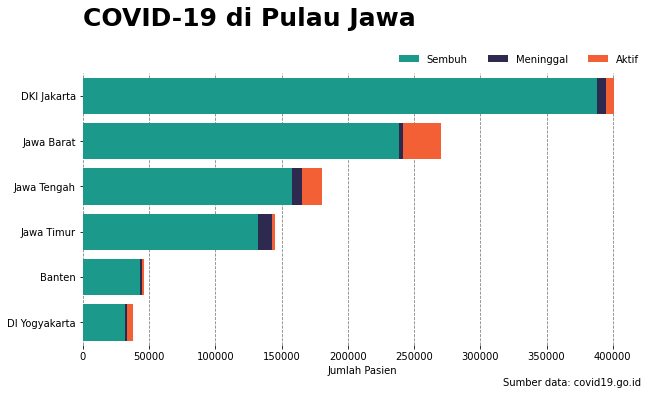

In [8]:
import matplotlib.pyplot as plt

fields = ['sembuh_total','meninggal_total','kasus_aktif']
colors = ['#1b998b', '#2e294e', '#f46036']
labels = ['Sembuh', 'Meninggal', 'Aktif']
# figure dan axis
fig, ax = plt.subplots(1, figsize=(10, 5))
# plot bars
left = len(data_grup) * [0]
for idx, name in enumerate(fields):
    plt.barh(data_grup.index, data_grup[name], left = left, color=colors[idx])
    left = left + data_grup[name]
# title, legend, labels
plt.title('COVID-19 di Pulau Jawa\n', fontsize=25, loc='left', y=1.05, fontweight='bold')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, -0.05]), ncol=3, frameon=False)
plt.xlabel('Jumlah Pasien')
ax.text(1, -0.15, 'Sumber data: covid19.go.id', color='black', ha='right', transform=ax.transAxes)
# menghilangkan spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# mengatur limit and membuat grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

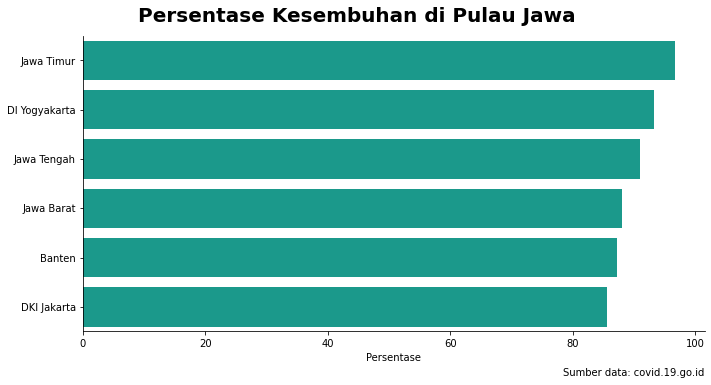

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

#plot bars
ax.barh(data=data.sort_values('sembuh_persen'), width='sembuh_persen', y=data.index, color='#1b998b')

# titels dan labels
fig.suptitle('Persentase Kesembuhan di Pulau Jawa', 
             y=1.05, fontsize=20, fontweight='bold', ha='center')
ax.set_xlabel('Persentase')
ax.set_ylabel('')
ax.text(1, -0.15, 'Sumber data: covid.19.go.id', color='black',
        ha='right', transform=ax.transAxes)

# menghilangkan spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#mengatur limits
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
plt.tight_layout()
plt.show()